<img src="http://www.evanmarie.com/content/files/notebook_images/image_recognition.png" width=800>

### **~ Evan Marie Carr**<br>
www.EvanMarie.com
<br>
<br>
Steps and Topics:
- MNIST Set
- Dataloader, Transformation
- Multilayer Neural Network
- Activation Function
- Loss and Optimizer
- Training Loop with Batches
- Model Evaluation
- GPU Support

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Getting the Data:

In [ ]:
batch_size = 100

train_dataset = torchvision.datasets.MNIST(root="./data", train=True, 
                                           transform=transforms.ToTensor(), 
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root="./data", train=False, 
                                           transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### Defining Hyperparameters

In [ ]:
input_size = 784     # images are 28*28, when flattened 784
hidden_size = 333    # this can be experimented with
num_classes = 10 
num_epochs = 33       # low to speed training
learning_rate = 0.00333

### Iterate Over a Batch:

[**`.iter()`** and **`.next()`**](https://www.programiz.com/python-programming/iterator)

In [ ]:
examples = iter(train_loader)
samples, labels = examples.next()

print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


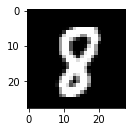

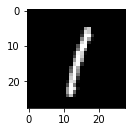

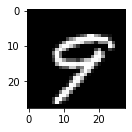

In [ ]:
for i in range(3):
  plt.subplot(1, 3, i+1)    # i+1 is subplot index
  plt.imshow(samples[i][0], cmap='gray')  # [0] is for just 1st channel
  plt.show()

### Defining the Model:

[PyTorch Optimizer Docs](https://pytorch.org/docs/stable/optim.html)

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.input_size = input_size
    self.linear01 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear02 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.linear01(x)
    out = self.relu(out)
    out = self.linear02(out)
    # No softmax here, since it is mutliclass and we will use cross-entropy
    # which applies softmax
    return out

In [ ]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

### Training Loop:

In [ ]:
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)


    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i + 1) % 300 == 0:
      if (epoch + 1) % 3 == 0:
        print(f"epoch: {epoch+1}/{num_epochs}, step: {i+1}/{n_total_steps}, loss: {loss.item():.4f}")

epoch: 3/33, step: 300/600, loss: 0.0366
epoch: 3/33, step: 600/600, loss: 0.0860
epoch: 6/33, step: 300/600, loss: 0.0087
epoch: 6/33, step: 600/600, loss: 0.0350
epoch: 9/33, step: 300/600, loss: 0.0433
epoch: 9/33, step: 600/600, loss: 0.0386
epoch: 12/33, step: 300/600, loss: 0.0001
epoch: 12/33, step: 600/600, loss: 0.0020
epoch: 15/33, step: 300/600, loss: 0.0052
epoch: 15/33, step: 600/600, loss: 0.0036
epoch: 18/33, step: 300/600, loss: 0.0595
epoch: 18/33, step: 600/600, loss: 0.0147
epoch: 21/33, step: 300/600, loss: 0.0021
epoch: 21/33, step: 600/600, loss: 0.0005
epoch: 24/33, step: 300/600, loss: 0.0006
epoch: 24/33, step: 600/600, loss: 0.0003
epoch: 27/33, step: 300/600, loss: 0.0002
epoch: 27/33, step: 600/600, loss: 0.0000
epoch: 30/33, step: 300/600, loss: 0.0000
epoch: 30/33, step: 600/600, loss: 0.0000
epoch: 33/33, step: 300/600, loss: 0.0000
epoch: 33/33, step: 600/600, loss: 0.0145


### Testing Model:

In [ ]:
with torch.no_grad():
  num_correct = 0
  num_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    # torch.max() will return index and value
    _, predictions = torch.max(outputs.data, 1)
    num_samples += labels.size(0)
    num_correct += (predictions == labels).sum().item()
  accuracy = 100 * num_correct / num_samples
  
  print(f"Accuracy: {accuracy}%.")

Accuracy: 98.21%.


In [ ]:

!pip install jovian
import jovian
jovian.commit()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: 